In [67]:
'''
Import here useful libraries
Run this cell first for convenience
'''
import numpy as np
from scipy import stats
import scipy
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from stemgraphic import stem_graphic
from scipy import stats
from scipy.ndimage import mean, median, variance
warnings.simplefilter('ignore', DeprecationWarning)

# Chapter 6 - Descriptive Statistics

## Experimentation

### Data and Statistical Inference

- Data: mixture of nature and noise
    - Our goal: we want to represent data with a probability distribution
- Statistical inference: the science of deducing properties of an underlying probability distribution from data

### Samples

- Population: set of all the possible observations from a particular probability distribution
- Sample: a subset of a population
- Random sample: sample where the elements are chosen at random from the population
    - A sample is desired to be representative of the population
- Types of observations:
    - Numerical (just numbers)
    - Nominal (classes, e.g. male/female, shirts/socks/pants...)

## Data Presentation

In [47]:
# Data set example (Service times)

data = np.array([45,62,52,72,91,88,64,65,69,59,70,63,80,70,59,87,59,69,68,69,56,59,74,60,79,56,177,61,60,78,66,61,47,63,63,57,77,67,55,55,56,39,65,60,80,41,72,77,54,81,63,70,73,76,61,75,62,59,64,61,70,65,83,61,56,64,72,90,86,63,63,63,65,80,69,62,75,59,81,79,94,63,64,55,61,66,65,72,61,76,48,92,135,67,73,66,143,82,71,51,70,71,45,64,89,66,66,65,60,64,59,93,84,47,48,65,74,57,62,79,62,68,73,54,55,78,69,69,61,186,55,68,76,70,69,61,55,61,82,83,66,59,69,61,93,76,81,65,67,51,69,77,78,63,77,61,61,66,87,53,67,78,68,80,89,77,63,67,95,54,64,63,28,73,75,65,67,62,65,88,78,75,71,72,60,53,67,81,85,71,49,70,49,58,63,105,62,72,66,79])
data = data.reshape(len(data), 1) # Prepare the data for pandas
df = pd.DataFrame(data=data, columns=['Service Times']) # Transform data to pandas DataFrame
print('Data: \n', df)

Data: 
      Service Times
0               45
1               62
2               52
3               72
4               91
..             ...
195            105
196             62
197             72
198             66
199             79

[200 rows x 1 columns]


### Histograms

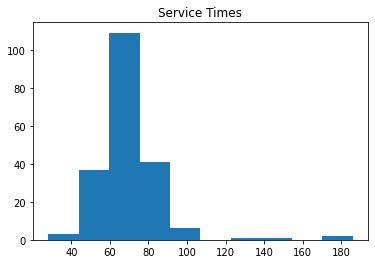

In [41]:
df.hist(['Service Times'], grid=False)
plt.show()

### Leaf Plots

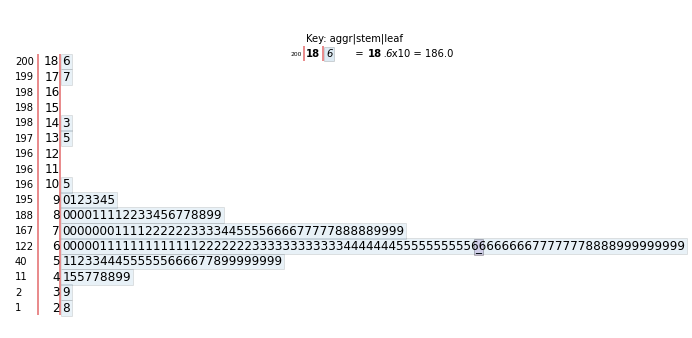

In [40]:
stem_graphic(df['Service Times'])
plt.show()

### Outliers

- Outlier: observation which is not from the distribution from which the main body of the sample is collected
    - Outliers should be removed for analysis

In [51]:
# Outlier detection using the interquantile range (given previous dataset)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# We print the outliers here
mask = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
filtered_data = (mask*df).to_numpy()
print("Outliers:")
for datum in filtered_data:
    if(datum != 0):
        print(datum)

Outliers:
[177]
[135]
[143]
[186]
[28]
[105]


### Box Plots

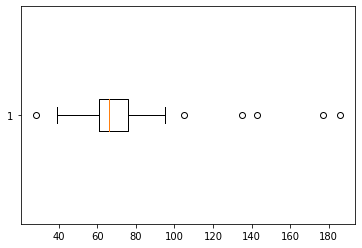

In [50]:
# Used for clearly showing the outliers of the distribution (from previous dataset)

plt.boxplot(df, vert=False)
plt.show()

## Sample Statistics

- Sample: $X_1, \cdots, X_n$

### Sample mean
\begin{equation}
    \bar{X} = \frac{\sum_{i=1}^n X_i}{n}
\end{equation}

In [54]:
print("Sample mean: ", mean(df))

Sample mean:  Service Times    69.345
dtype: float64


### Sample median
- The $(n+1)/2$-th smallest sample when $n$ is odd
- The average of the $n/2$-th and the $(n+1)/2$-th smallest sample when $n$ is even

In [53]:
print("Sample median: ", median(df))

Sample median:  66.0


### Sample trimmed mean
- The average of the subset of the sample obtained by removing the top $r%$ and the bottom $r%$ from the sample

In [55]:
r = 0.05 # r value for trimming
print("Sample trimmed mean: ", stats.trim_mean(df, r))

Sample trimmed mean:  [67.88333333]


### Sample mode
- The value at which the sample frequency is the largest

In [60]:
print("Sample mode: ", stats.mode(df))

Sample mode:  ModeResult(mode=array([[61]]), count=array([[13]]))


### Sample variance
\begin{equation}
    S^2 = \frac{ \sum_i^n (X_i - \bar{X})^2}{n-1}
\end{equation}
- $S$ is called the sample standard deviation

In [69]:
print("Sample variance: ", stats.tstd(df)**2)
print("Sample standard deviation: ", stats.tstd(df))

Sample variance:  [309.31253769]
Sample standard deviation:  [17.58728341]


### Sample quantile
- $(100p)$-th sample quantile is the value satisfying:
\begin{equation}
    \frac{ \# (X_i \leq y)}{n} \geq p
\end{equation}
and
\begin{equation}
    \frac{ \# (X_i \geq y)}{n} \geq 1- p
\end{equation}
- The 25-th and 75-th sample quantiles are called 1-st ($Q_1$) and 3-rd ($Q_3$) respectively
- Interquantile range (IQR): $Q_3 - Q_1$

In [63]:
print("Upper sample quartile: ", stats.mstats.mquantiles(df, prob=[0.75]))
print("Lower sample quartile: ", stats.mstats.mquantiles(df, prob=[0.25]))
print("Interquantile range: ", (stats.mstats.mquantiles(df, prob=[0.75]) - stats.mstats.mquantiles(df, prob=[0.25])))

Upper sample quartile:  [76.]
Lower sample quartile:  [61.]
Interquantile range:  [15.]


### Coefficient of variation
\begin{equation}
    CV = \frac{S}{\bar{X}}
\end{equation}
where $\bar{X}$ is the sample mean

In [64]:
print("Coefficient of variation: ", stats.variation(df))

Coefficient of variation:  [0.25298522]
